In [1]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from imblearn.over_sampling import SMOTE
%matplotlib inline

# Loading Data In

In [3]:
df = pd.read_csv("final_data.csv")
df.head()
# df['favorite'].value_counts()

,track_id,album,artist,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,favorite
0,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,Bruno Mars,0,0.0000,0.000002,0.000355,0.0,0.0202,-7.542,0.0000,119.6005,0
1,5QO79kh1waicV47BqGRL3g,After Hours,The Weeknd,0,0.0596,0.000002,0.000568,0.0,0.0211,-7.542,0.0228,34.3030,0
2,1diS6nkxMQc3wwC4G1j0bh,Future Nostalgia (The Moonlight Edition),Dua Lipa,0,0.0610,0.000002,0.000569,0.0,0.0228,-7.542,0.0229,34.8750,0
3,4u4NyuceXP7Uzh7XFJKCr1,Hold On,Justin Bieber,0,0.0612,0.000002,0.000707,0.0,0.0229,-7.542,0.0232,37.3990,0
4,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Masked Wolf,0,0.0624,0.000003,0.000737,0.0,0.0251,-7.542,0.0234,44.5980,0


# Data Splitting

In [4]:
#Creating train and test sets

shuffled = df.sample(frac = 1)

train_frac = int(0.8*len(df))

train = shuffled[:train_frac]
test = shuffled[train_frac:]
train.head()

,track_id,album,artist,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,favorite
6588,2pZL9DNKxnPwRk7hQPUvrL,Rush Over Me (Seven Lions 1999 Remix),Seven Lions,52,0.629,0.381,0.699,0.019300,0.144,-6.396,0.0581,125.447,0
4310,3jYRpwbctfqB77uU7T7K3U,Special Forces,38 Special,39,0.510,0.088,0.523,0.000048,0.108,-8.913,0.0438,108.577,0
8727,5WOMgv6ks1MyqIKpo4rCXN,Gran Partita,Thaous Ensemble,63,0.739,0.912,0.841,0.774000,0.271,-4.832,0.1140,144.065,0
6758,7EYLrneh08x29IAWLl7Tst,Same Love,Prince Fox,52,0.637,0.421,0.710,0.028700,0.150,-6.261,0.0602,126.024,0
5256,1ydm3DkQ1KOlawhvfl9XCn,What If,SKIY,45,0.559,0.170,0.605,0.000568,0.118,-7.639,0.0481,118.092,0


In [5]:
x = train.drop(columns = ['favorite', 'album', 'artist', 'track_id'])
y = train.favorite

x_test = test.drop(columns = ['favorite', 'album', 'artist', 'track_id'])
y_test = test.favorite

# Addressing Imbalanced Dataset


In [6]:
#experimenting with SMOTE oversampling methods
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

#SMOTE
smot = SMOTE()
x_smote, y_smote = smot.fit_resample(x, y)


#SMOTE + Tomek
smotom = SMOTETomek()
x_smotom, y_smotom = smotom.fit_resample(x,y)


#SMOTE + ENN
smoten = SMOTEENN()
x_smoten, y_smoten = smoten.fit_resample(x,y)

In [7]:
y_smote.value_counts()

0    7821
1    7821
Name: favorite, dtype: int64

In [8]:
#create funtion to draw confusion matrix as well as output metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

def model_perform(model, x_test, y_test):
    y_prob = model.predict_proba(x_test)
    y_pred = model.predict(x_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print(roc_auc_score(y_test, y_prob[:,1]))
    
    print('='*60)
    
    print('Precision: ')
    print(precision_score(y_test, y_pred))
    print('Recall: ')
    print(recall_score(y_test, y_pred))
    print('F1 Score: ')
    print(f1_score(y_test, y_pred))


In [9]:
from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### K Nearest Neighbors Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()


knn.fit(x, y)
pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


0.9995340167753961

Text(0, 0.5, 'Accuracy Score')

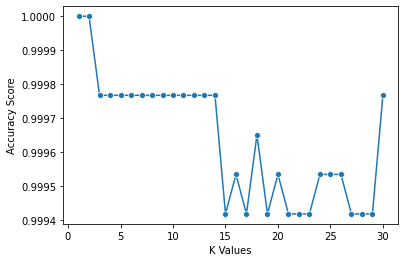

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [12]:
knn_fin = KNeighborsClassifier(n_neighbors = 5)

#SMOTE data
smot_knn = knn_fin.fit(x_smote, y_smote)

# Predicting results using Test data set
pred = smot_knn.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

model_perform(smot_knn, x_test, y_test)

Confusion Matrix
[[1947    1]
 [   0  198]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1948
           1       0.99      1.00      1.00       198

    accuracy                           1.00      2146
   macro avg       1.00      1.00      1.00      2146
weighted avg       1.00      1.00      1.00      2146
 

AUC-ROC
1.0
Precision: 
0.9949748743718593
Recall: 
1.0
F1 Score: 
0.9974811083123425


In [13]:
#SMOTE + Tomek
smotom_knn = knn_fin.fit(x_smotom, y_smotom)

model_perform(smotom_knn, x_test, y_test)

Confusion Matrix
[[1947    1]
 [   0  198]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1948
           1       0.99      1.00      1.00       198

    accuracy                           1.00      2146
   macro avg       1.00      1.00      1.00      2146
weighted avg       1.00      1.00      1.00      2146
 

AUC-ROC
1.0
Precision: 
0.9949748743718593
Recall: 
1.0
F1 Score: 
0.9974811083123425


In [14]:
#SMOTE + ENN
smoten_knn = knn.fit(x_smoten, y_smoten)

model_perform(smoten_knn, x_test, y_test)

Confusion Matrix
[[1945    3]
 [   0  198]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1948
           1       0.99      1.00      0.99       198

    accuracy                           1.00      2146
   macro avg       0.99      1.00      1.00      2146
weighted avg       1.00      1.00      1.00      2146
 

AUC-ROC
0.9997433264887063
Precision: 
0.9850746268656716
Recall: 
1.0
F1 Score: 
0.9924812030075187


### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'max_depth':[3, 4, 5, 6, 10],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 2))])
dtc.fit(x, y)
dtc.named_steps['CV'].best_params_

{'max_depth': 4}

In [16]:
dt_fin = DecisionTreeClassifier(max_depth=4).fit(x, y)
dt_scores = cross_val_score(dt_fin, x, y, cv=10, scoring="f1")
np.mean(dt_scores)

1.0

In [17]:
model_perform(dt_fin, x_test, y_test)

Confusion Matrix
[[1948    0]
 [   1  197]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1948
           1       1.00      0.99      1.00       198

    accuracy                           1.00      2146
   macro avg       1.00      1.00      1.00      2146
weighted avg       1.00      1.00      1.00      2146
 

AUC-ROC
0.9974747474747474
Precision: 
1.0
Recall: 
0.9949494949494949
F1 Score: 
0.9974683544303797


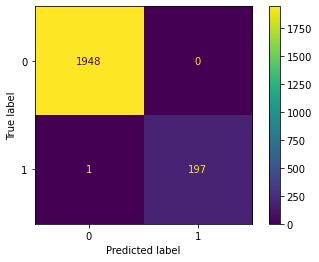

In [18]:
predictions = dt_fin.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=dt_fin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_fin.classes_)
disp.plot()

plt.show()

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth':[3, 6,12,15,20],
    'n_estimators':[10, 20,30]
}
rfor = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
rfor.fit(x, y)
rfor.named_steps['CV'].best_params_

{'max_depth': 3, 'n_estimators': 10}

In [20]:
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 20, max_depth = 20).fit(x, y))])
rf_scores = cross_val_score(rf, x, y, cv=10, scoring="f1")
np.mean(rf_scores)

1.0

In [21]:
model_perform(rf, x_test, y_test)

Confusion Matrix
[[1948    0]
 [   2  196]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1948
           1       1.00      0.99      0.99       198

    accuracy                           1.00      2146
   macro avg       1.00      0.99      1.00      2146
weighted avg       1.00      1.00      1.00      2146
 

AUC-ROC
1.0
Precision: 
1.0
Recall: 
0.98989898989899
F1 Score: 
0.9949238578680203


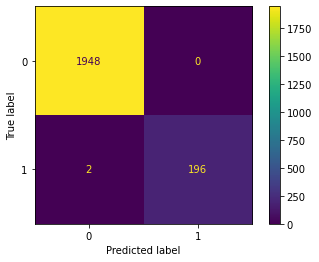

In [22]:
predictions = rf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

### SVC

In [23]:
from sklearn.svm import SVC

parameters = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
} 
svm = Pipeline([('CV',GridSearchCV(SVC(), parameters, cv = 5))])
svm.fit(x, y)
svm.named_steps['CV'].best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [24]:
svc_fin = Pipeline([('svc', SVC(C = 100, gamma = 0.1, kernel = 'rbf').fit(x, y))])
svc_scores = cross_val_score(svc_fin, x, y, cv=10, scoring="f1")
np.mean(svc_scores)

0.9986928104575163

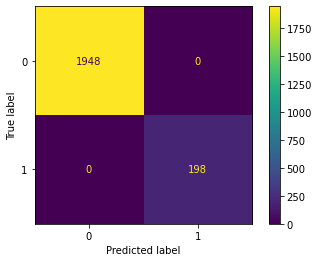

In [25]:
predictions = svc_fin.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=svc_fin.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_fin.classes_)
disp.plot()

plt.show()

### Display Recommended Songs

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=4))
pipe.fit(x, y)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30))])

pipe.score(x_test, y_test)

0.9990680335507922

In [40]:
x.head()

,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo
6588,52,0.629,0.381,0.699,0.019300,0.144,-6.396,0.0581,125.447
4310,39,0.510,0.088,0.523,0.000048,0.108,-8.913,0.0438,108.577
8727,63,0.739,0.912,0.841,0.774000,0.271,-4.832,0.1140,144.065
6758,52,0.637,0.421,0.710,0.028700,0.150,-6.261,0.0602,126.024
5256,45,0.559,0.170,0.605,0.000568,0.118,-7.639,0.0481,118.092


In [43]:
general = pd.read_csv('playlist_songs.csv')
general.head()

,track_id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,Leave The Door Open,Bruno Mars,2021-03-05,242096,90,0.586,0.1820,0.616,0.000000,0.0927,-7.964,0.0324,148.088,4
1,5QO79kh1waicV47BqGRL3g,Save Your Tears,After Hours,The Weeknd,2020-03-20,215626,97,0.680,0.0212,0.826,0.000012,0.5430,-5.487,0.0309,118.051,4
2,1diS6nkxMQc3wwC4G1j0bh,We're Good,Future Nostalgia (The Moonlight Edition),Dua Lipa,2021-02-11,165506,88,0.722,0.0319,0.588,0.000000,0.1830,-5.932,0.0544,134.010,4
3,4u4NyuceXP7Uzh7XFJKCr1,Hold On,Hold On,Justin Bieber,2021-03-05,170813,89,0.658,0.0106,0.634,0.000000,0.1320,-5.797,0.0413,139.980,4
4,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Astronaut In The Ocean,Masked Wolf,2021-01-06,132780,94,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4


In [44]:
prob_preds = pipe.predict_proba(general.drop(['name', 'album', 'artist', 'track_id', 'release_date', 'time_signature', 'length'], axis=1))
threshold = 0.2 # define threshold here
preds = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
general['prediction'] = preds

In [45]:
general['prediction'].value_counts()

0    8893
1     876
Name: prediction, dtype: int64

In [46]:
recs = df.loc[general['prediction'] == 1]['name']
recs.head()

8                             Levitating (feat. DaBaby)
17                                   My Head & My Heart
29    Friday (feat. Mufasa & Hypeman) - Dopamine Re-...
34    Wellerman - Sea Shanty / 220 KID x Billen Ted ...
40                               Mood (feat. iann dior)
Name: name, dtype: object